In [1]:
import matplotlib.pyplot as plt
from molass.Local import get_local_settings
local_settings = get_local_settings()
ORIGINAL_DATA = local_settings['ORIGINAL_DATA']
print(ORIGINAL_DATA)

D:\PyTools\Data\sample_data


# Trimming

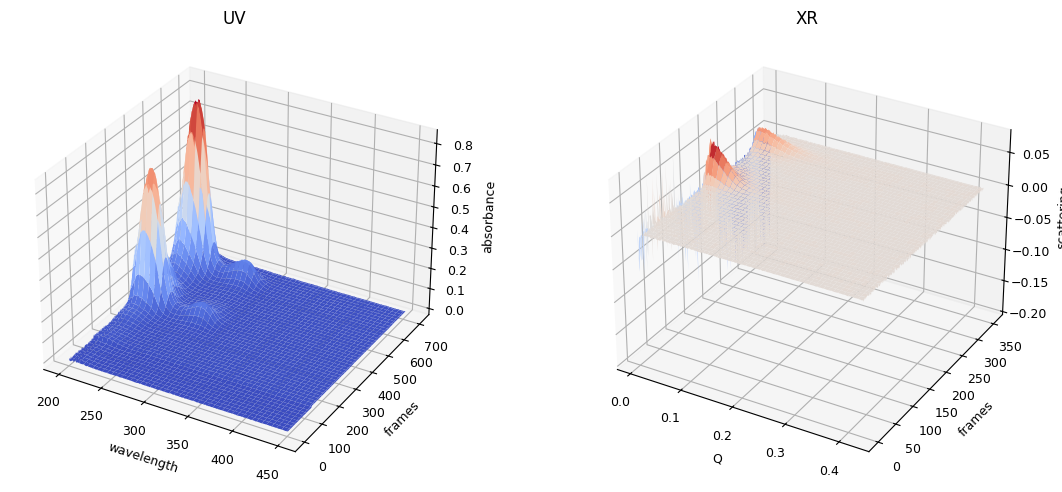

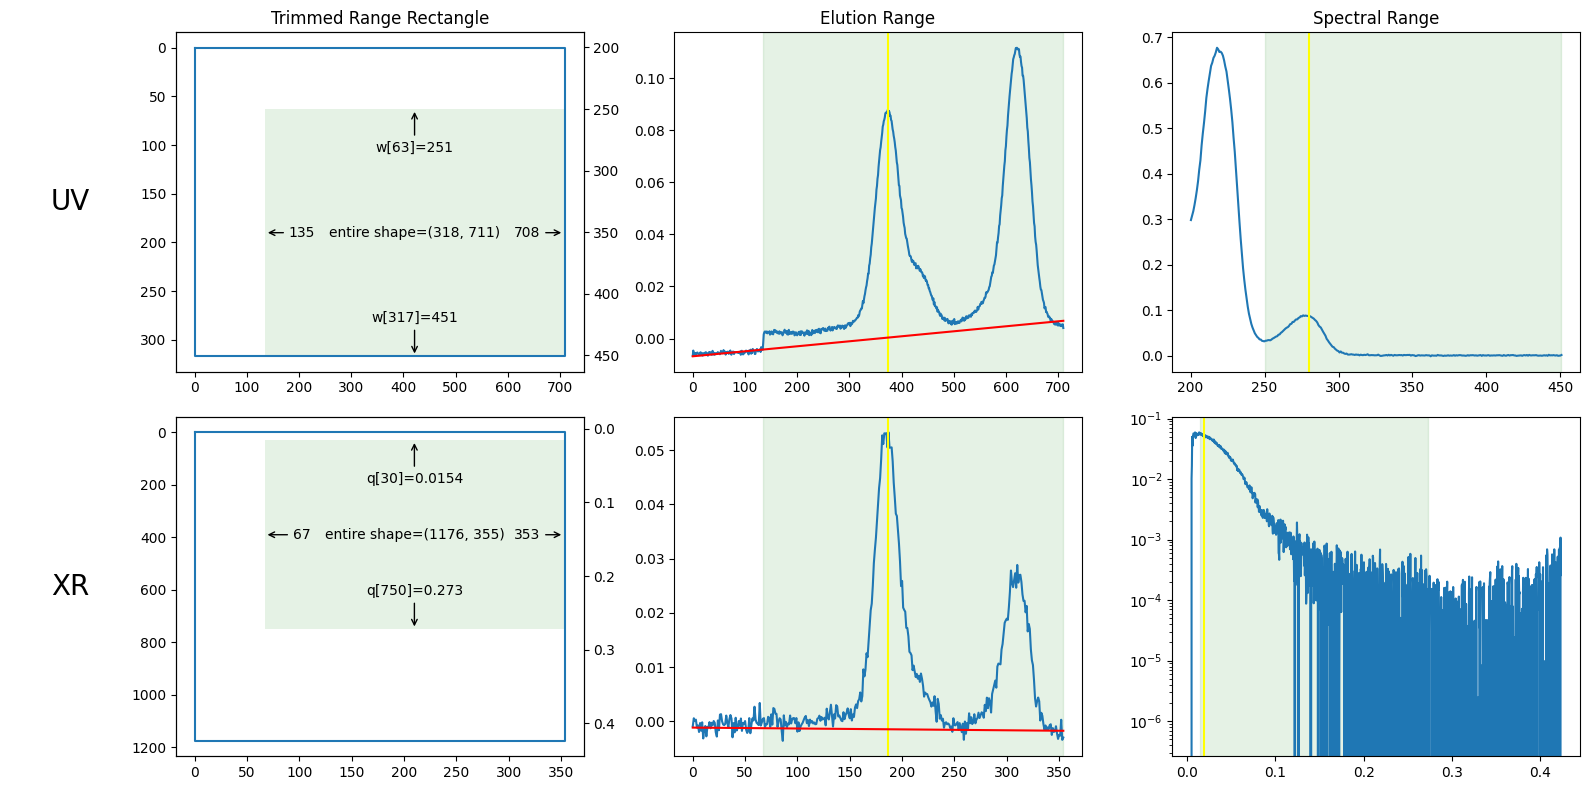

In [2]:
from molass.Global.Options import set_molass_options
from molass.DataObjects import SecSaxsData as SSD
set_molass_options(flowchange=True)
original_data_folder = ORIGINAL_DATA
ssd0 = SSD(original_data_folder)
ssd0.plot_3d()
plot_result0 = ssd0.plot_trimming_info();

In [3]:
plot_result0.trimming.xr_slices, plot_result0.trimming.uv_slices

((slice(30, 751, None), slice(67, 354, None)),
 (slice(63, None, None), slice(135, 709, None)))

In [4]:
import os
import tempfile
import shutil
from importlib import reload
import molass.DataUtils.UvFileTrimming
reload(molass.DataUtils.UvFileTrimming)
from molass.DataUtils.UvFileTrimming import trim_uvfile

# Define the temporary directory name
temp_dir = os.path.join(tempfile.gettempdir(), "tutorial_data")

# Clear the directory if it already exists
if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)

# Create the temporary directory
os.makedirs(temp_dir)

print(f"Temporary directory created at: {temp_dir}")

uv_filename = "SAMPLE_UV280_01.txt"
in_uvfile = os.path.join(original_data_folder, uv_filename)
trimmed_uvfile = os.path.join(temp_dir, uv_filename)
jslice = plot_result0.trimming.uv_slices[1]
trim_uvfile(in_uvfile,
            (slice(None, None), jslice),    # slicing only the second axis
            trimmed_uvfile)

Temporary directory created at: C:\Users\takahashi\AppData\Local\Temp\tutorial_data


In [5]:
import os
import re
from molass.DataUtils.ZipFolder import zip_folder

from glob import glob
xr_islice = plot_result0.trimming.xr_slices[1]
start, stop = xr_islice.start, xr_islice.stop
n = 0
for k, path in enumerate(glob(original_data_folder + "/*.dat")):
    if k >= start and k < stop:
        basename = re.sub(r"_\d{5}_sub", "_%05d_"%n, os.path.basename(path))
        target_path = os.path.join(temp_dir, basename)
        shutil.copy(path, target_path)
        print([k], "copying from %s to %s" % (path, basename))
        n += 1

# Define the zip file name
zip_file = os.path.join(tempfile.gettempdir(), "tutorial_data.zip")

# # Zip the temp folder to zip_file
zip_folder(temp_dir, zip_file)

print(f"Temporary directory zipped at: {zip_file}")

[67] copying from D:\PyTools\Data\sample_data\SAMPLE_00067_sub.dat to SAMPLE_00000_.dat
[68] copying from D:\PyTools\Data\sample_data\SAMPLE_00068_sub.dat to SAMPLE_00001_.dat
[69] copying from D:\PyTools\Data\sample_data\SAMPLE_00069_sub.dat to SAMPLE_00002_.dat
[70] copying from D:\PyTools\Data\sample_data\SAMPLE_00070_sub.dat to SAMPLE_00003_.dat
[71] copying from D:\PyTools\Data\sample_data\SAMPLE_00071_sub.dat to SAMPLE_00004_.dat
[72] copying from D:\PyTools\Data\sample_data\SAMPLE_00072_sub.dat to SAMPLE_00005_.dat
[73] copying from D:\PyTools\Data\sample_data\SAMPLE_00073_sub.dat to SAMPLE_00006_.dat
[74] copying from D:\PyTools\Data\sample_data\SAMPLE_00074_sub.dat to SAMPLE_00007_.dat
[75] copying from D:\PyTools\Data\sample_data\SAMPLE_00075_sub.dat to SAMPLE_00008_.dat
[76] copying from D:\PyTools\Data\sample_data\SAMPLE_00076_sub.dat to SAMPLE_00009_.dat
[77] copying from D:\PyTools\Data\sample_data\SAMPLE_00077_sub.dat to SAMPLE_00010_.dat
[78] copying from D:\PyTools\Dat

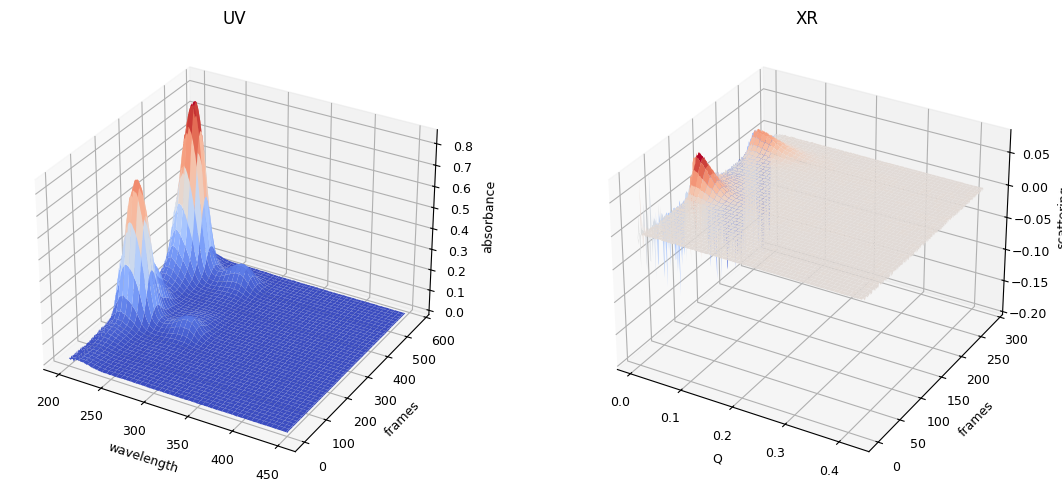

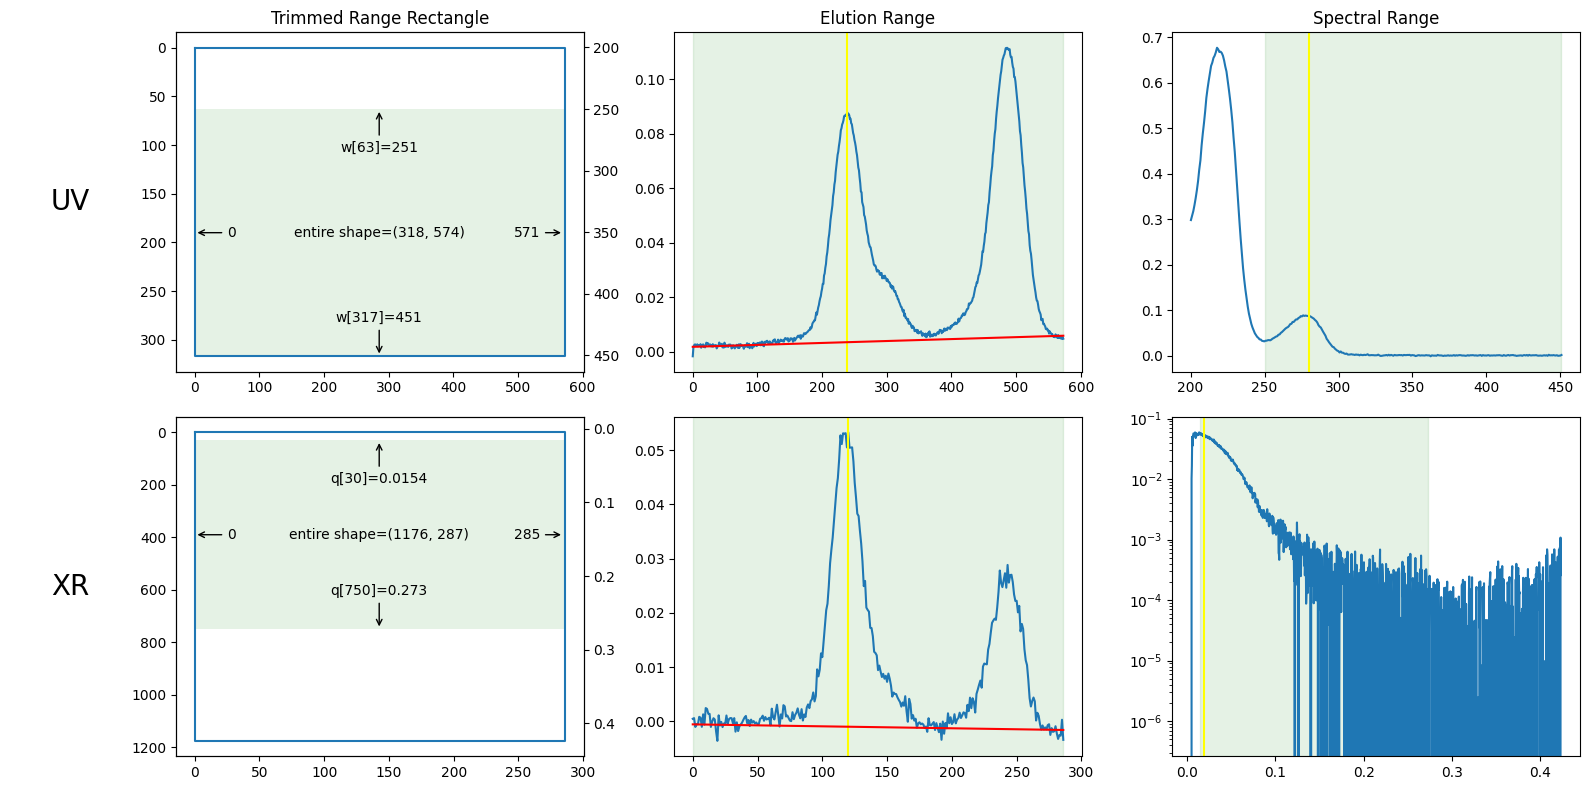

In [6]:
ssd1 = SSD(temp_dir)
ssd1.plot_3d()
plot_result1 = ssd1.plot_trimming_info();

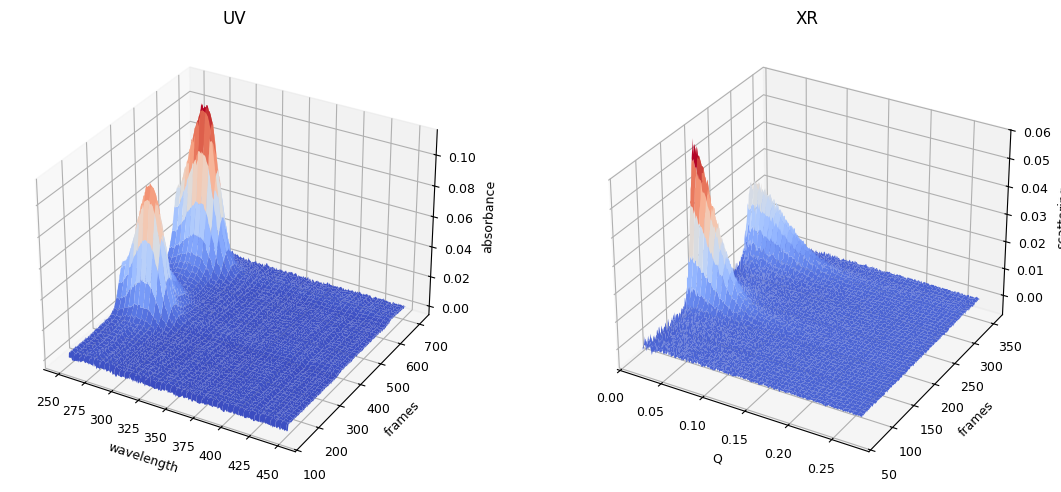

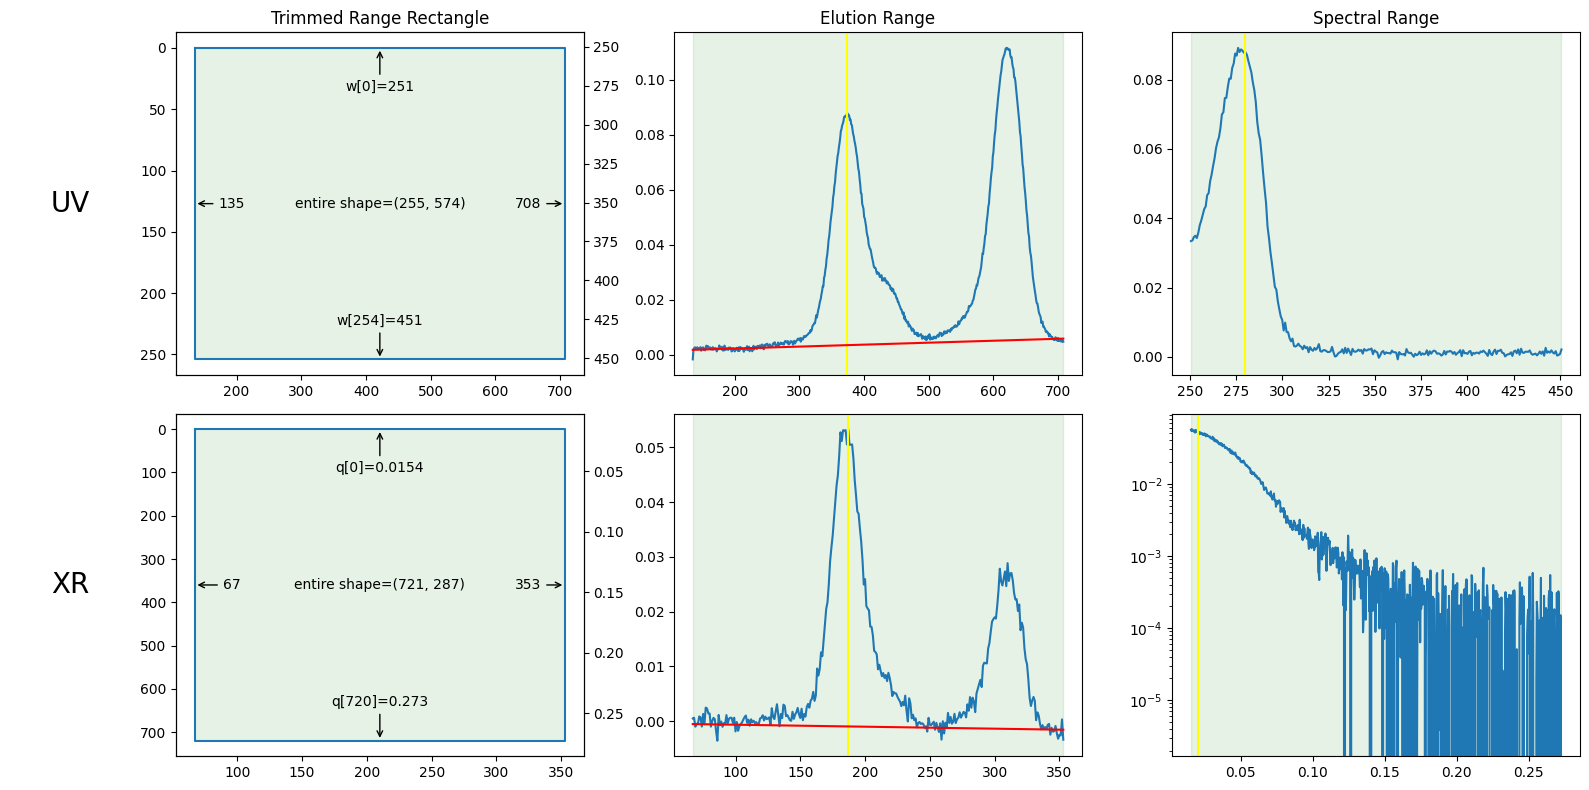

In [7]:
ssd2 = ssd0.trimmed_copy()
ssd2.plot_3d()
ssd2.plot_trimming_info()

developper memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.
C:\Program Files\Python312\Lib\site-packages\molass\PlotUtils\LowRankInfoPlot.py:133: RuntimeWarning: invalid value encountered in log
  logy = np.log(pv[slice_])


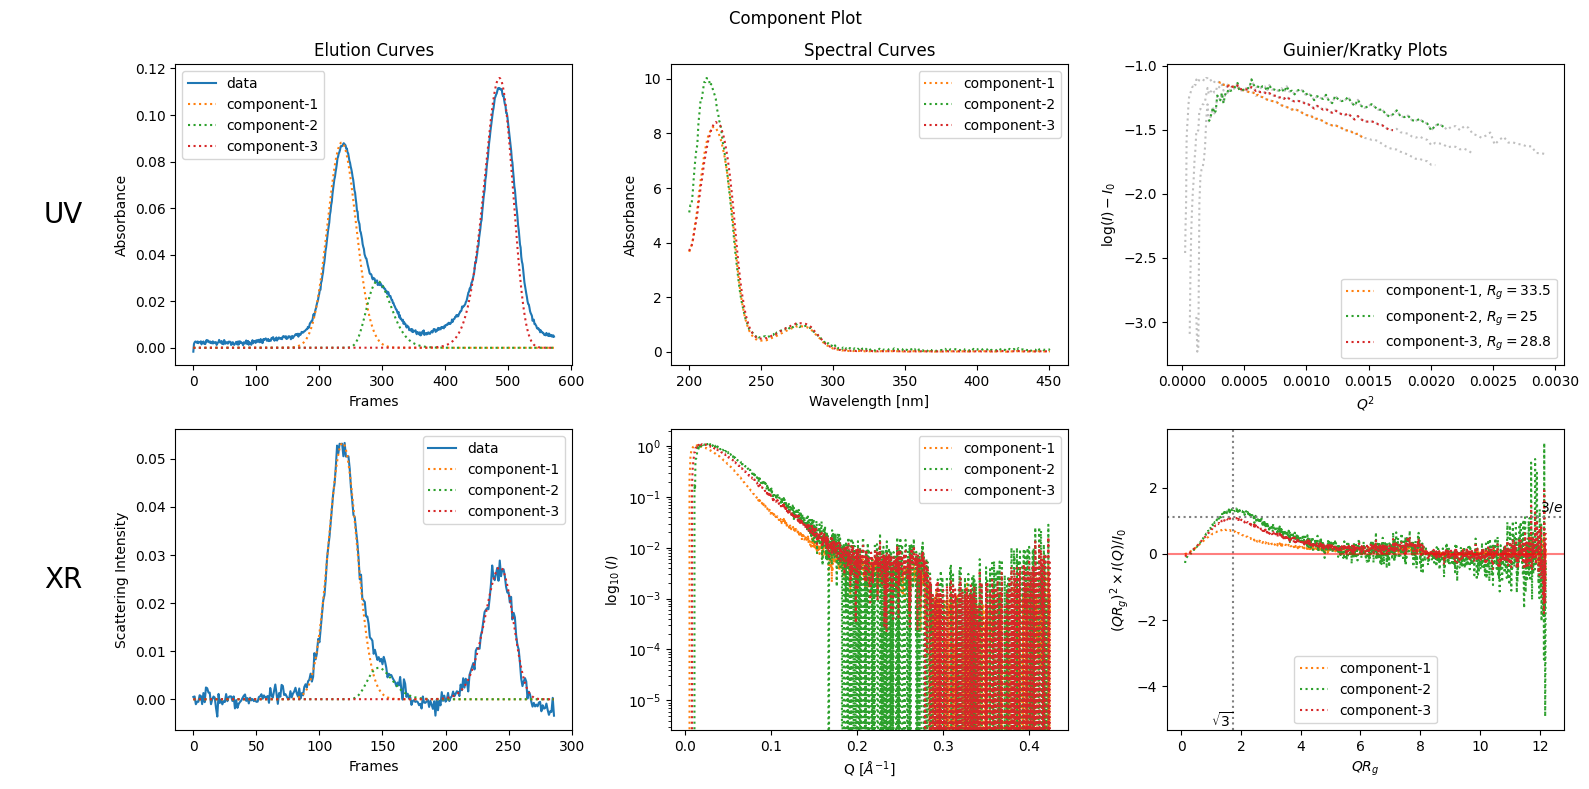

In [8]:
lr_info = ssd1.quick_lowrank_info(num_components=3, consistent_uv=True)
lr_info.plot_components();
    

In [9]:
for i, ccurve in enumerate(lr_info.xr_ccurves):
    print([i], ccurve.params)

[0] [5.33375194e-02 1.18383326e+02 1.12375405e+01 1.49006382e-01]
[1] [6.53516865e-03 1.46905984e+02 9.67977090e+00 3.97678763e+00]
[2] [ 2.74689524e-02  2.43103170e+02  1.12271272e+01 -3.14049514e+00]


In [10]:
for i, ccurve in enumerate(lr_info.uv_ccurves):
    print([i], ccurve.params)

[0] [8.82038073e-02 2.35753508e+02 2.25664432e+01 2.99224198e-01]
[1] [2.86064869e-02 2.93030716e+02 1.94382391e+01 7.98590686e+00]
[2] [ 1.15902609e-01  4.86207178e+02  2.25455318e+01 -6.30652276e+00]
